## Titanic Dataset with Machine Learning

## Approach

* Supervised learning models.
* Exploratory Data Analysis (EDA);
* We perform an EDA of feature variables, categorical and numeric.
* We explore our target variable visually and made your first predictions.


## Import the data

In [2]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [3]:
# Import test and train datasets
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

# View first lines of training data
df_train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [4]:
# View first lines of test data
df_test.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


* Use the DataFrame `.info()` method to check out datatypes, missing values and more (of `df_train`).

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


* Use the DataFrame `.describe()` method to check out summary statistics of numeric columns (of `df_train`).

In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Visual exploratory data analysis and your first model

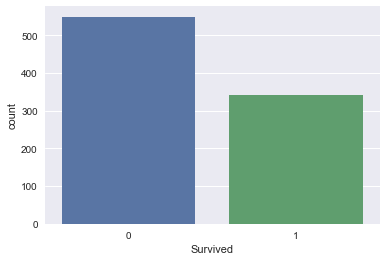

In [7]:
sns.countplot(x="Survived", data=df_train)

 **In the training set, less people survived.**

*  We take into account the worst case scenario that  all people 'did not survive' for all rows;
  and assign it to df_test and on to a .csv and submit to Kaggle.
* Our target variable here is survived 

In [8]:
df_test['Survived'] = 0
df_test[['PassengerId', 'Survived']].to_csv('data/predictions/no_survivors.csv', index=False)

## EDA on feature variables

* Use `seaborn` to build a bar plot of the Titanic dataset feature 'Sex' (of `df_train`).

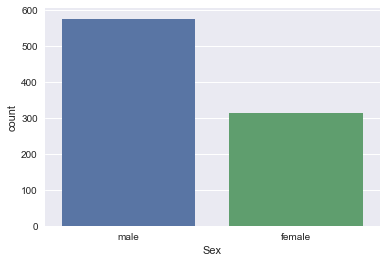

In [9]:
sns.countplot(x='Sex', data=df_train)

* Use `seaborn` to build bar plots of the Titanic dataset feature 'Survived' split (faceted) over the feature 'Sex'.

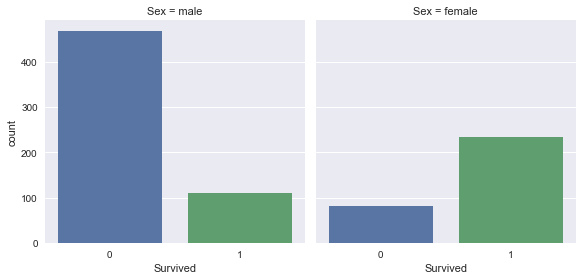

In [10]:
sns.factorplot(x='Survived', col='Sex', kind='count', data=df_train)

**Take-away:** Women were more likely to survive than men.

* Use `pandas` to figure out how many women and how many men survived.

In [11]:
df_train.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

### We calculate **proportion of women that survived**, along with the proportion of men:

In [12]:
print(df_train[df_train.Sex == 'female'].Survived.sum()/df_train[df_train.Sex == 'female'].Survived.count())
print(df_train[df_train.Sex == 'male'].Survived.sum()/df_train[df_train.Sex == 'male'].Survived.count())

0.7420382165605095
0.18890814558058924


74% of women survived, while 19% of men survived.

Let's now build **a second model and predict that all women survived** and all men didn't. Once again, this is an unrealistic model, but it will provide a baseline against which to compare future models.

In [23]:
df_test['Survived'] = df_test.Sex=='female'
#df_test.head(5) we want to change all true's to 1 and false to 0
#df_test.Survived.head()
df_test['Survived'] = df_test.Survived.apply(lambda x: int(x))
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [25]:
df_test[['PassengerId', 'Survived']].to_csv('data/predictions/women_survivors.csv', index=False)

## Explore your data more!

* Use `seaborn` to build bar plots of the Titanic dataset feature 'Survived' split (faceted) over the feature 'Pclass'.

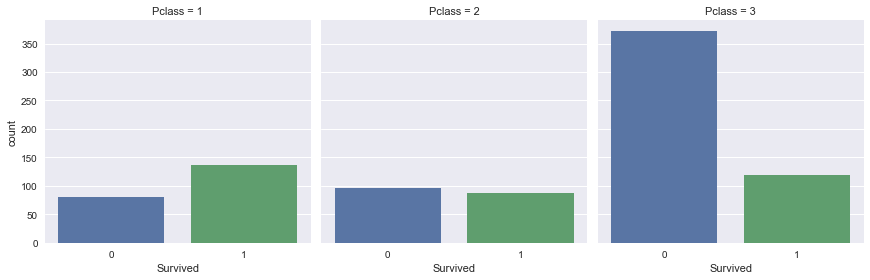

In [37]:
sns.factorplot(x='Survived', col='Pclass', kind='count', data=df_train)

** Passengers from first class were more likely to survive. Passengers from lower class tickets where least likely to survive**

* We build build bar plots of the Titanic dataset feature 'Survived' over the feature 'Embarked'.

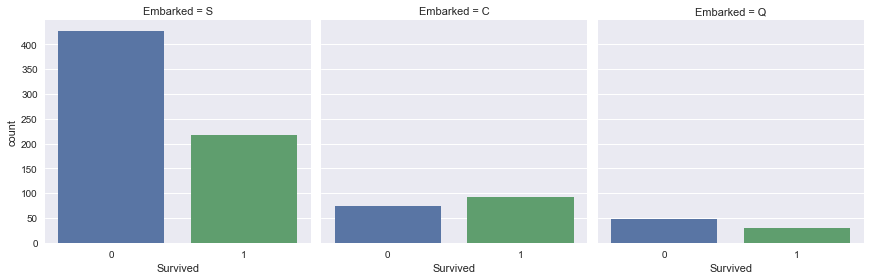

In [38]:
sns.factorplot(x="Survived", col="Embarked", kind="count", data=df_train)

** Passengers who embarked their journey from Southampton were less likely to survive**

## EDA with numeric variables

* Use `seaborn` to plot a histogram of the 'Fare' column of `df_train`.

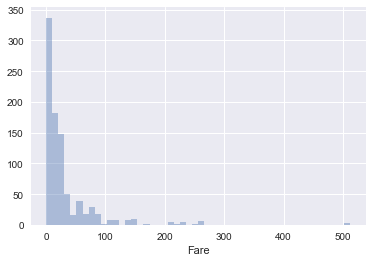

In [34]:
sns.distplot(df_train.Fare, kde=False)

** Most of the passengers Travel Fare was leass than 100 **

* We use a `pandas` plotting method to plot the column 'Fare' for each value of 'Survived' on the same plot.

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

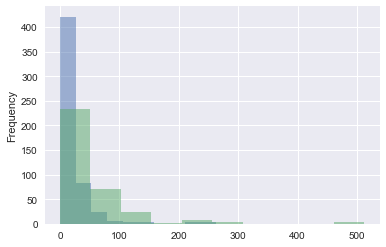

In [57]:
#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
#df_train.groupby('Survived').Fare.plot(kind='hist')
df_train.groupby('Survived').Fare.plot.hist (alpha=0.5)

:** Those who paid more had a higher chance of surviving **

* We plot a histogram of the 'Age' column of `df_train`. 

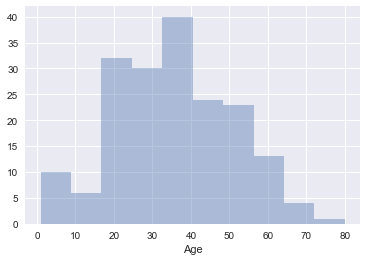

In [61]:
df_train_drop = df_train.dropna()
sns.distplot(df_train_drop.Age, kde= False)

* We Plot a strip plot & a swarm plot of `Fare` with `Survive` on the x-axis.

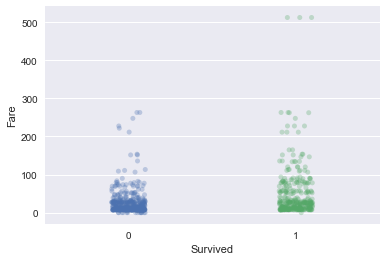

In [64]:
#jitter: Amount of jitter (only along the categorical axis) to apply. This can be useful when you have many points and they overlap, so that it is easier to see the distribution.
sns.stripplot(x='Survived', y='Fare', data=df_train, alpha=0.3, jitter=True);

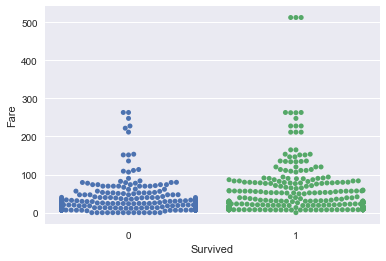

In [65]:
sns.swarmplot(x='Survived', y='Fare', data=df_train);

** Fare price is correlated with survival**

*We check out summary statistics of 'Fare' as a function of survival.

In [13]:
df_train.groupby('Survived').Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


# We use a scatter plot of 'Age' against 'Fare', colored by 'Survived'.

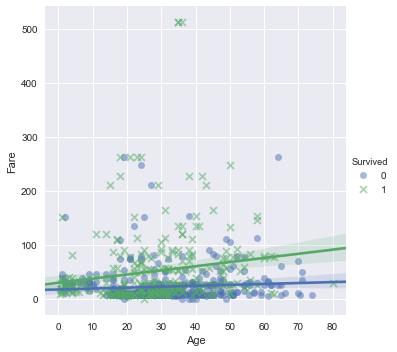

In [80]:
sns.lmplot(x='Age', y='Fare', hue='Survived',markers=["o", "x"], fit_reg=True, scatter_kws={'alpha':0.5},data=df_train)

**Take-away:** those who survived either paid quite a bit for their ticket or they were young.

* Use `seaborn` to create a pairplot of `df_train`, colored by 'Survived'.

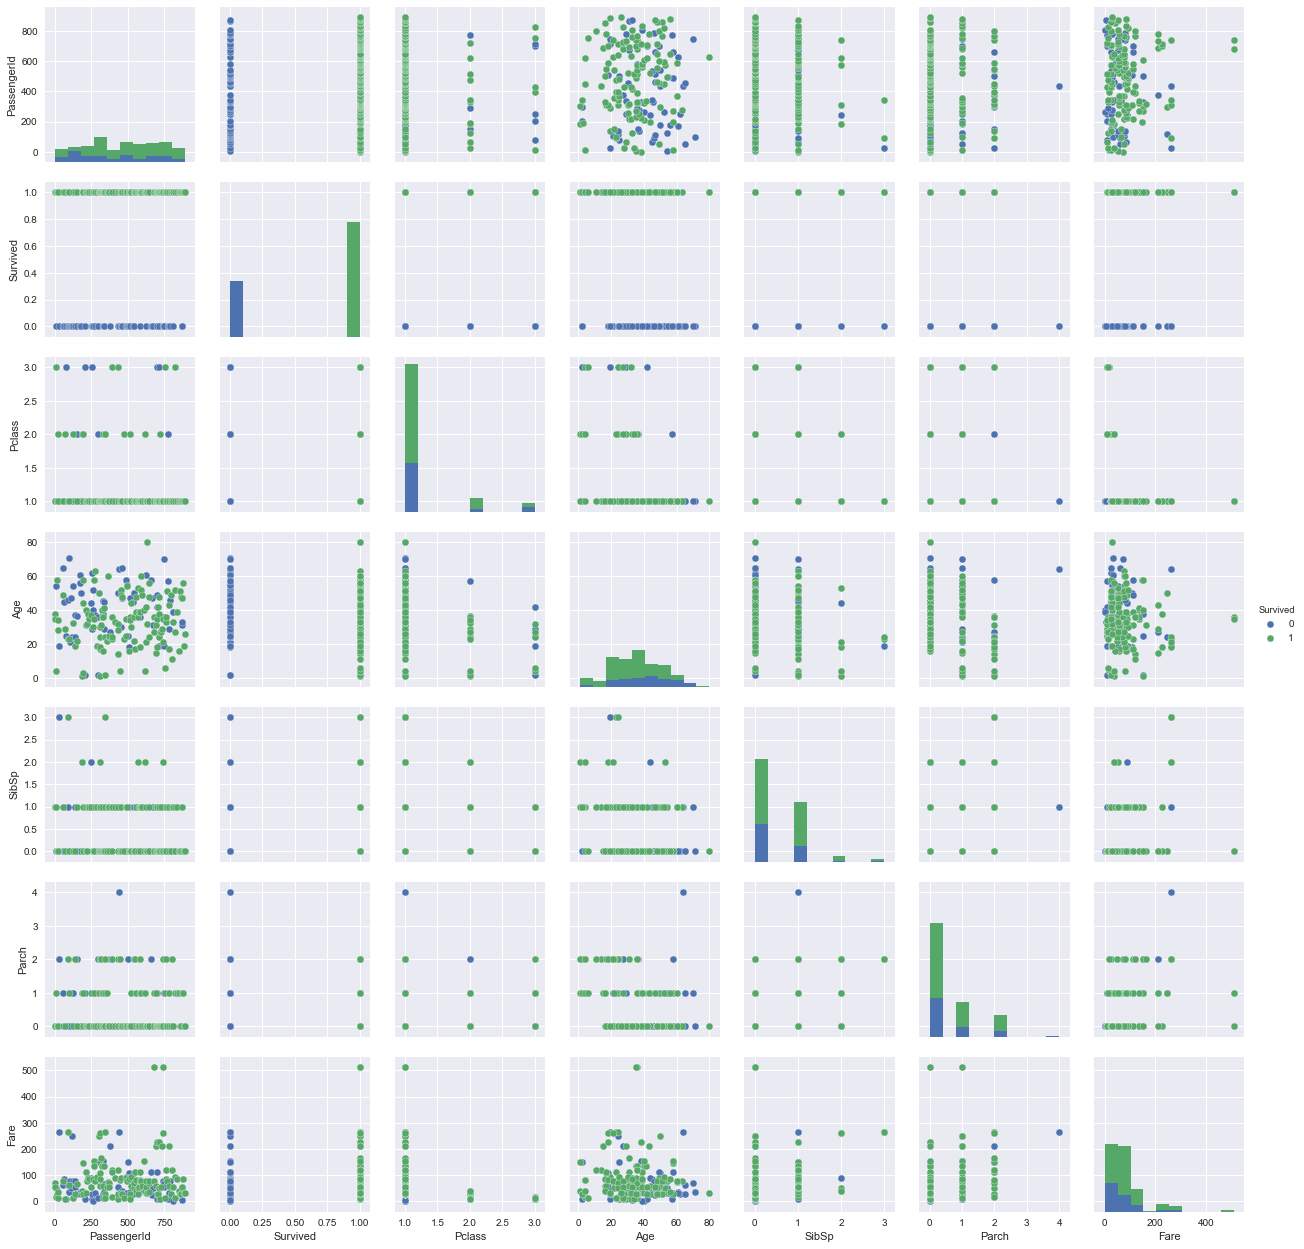

In [83]:
sns.pairplot(df_train_drop, hue='Survived')